# 5012 HW #2. Improve code Efficiency: Sort First!

## Scenario. 

In a two class, classification problem, it is common to use a classifier that outputs confidences (rather than simply class labels). A good example of this is a Support Vector Machine. A pro for using such a classifier is that you gain more information -- specifically the confidence in the classification result. A con is that in order to make a final classification decision, a threshold value must be determined. For example, if a threshold of 0.75 is chosen, the class label 1 would be assigned for confidences greater than 0.75 and for confidences less than 0.75 a class label of 0 would be assigned. However, this begs the question: how is the threshold chosen?

Many data scientists will choose a threshold based on the experimental results and/or operational constraints. In this code example, we assume that we have confidences and true labels for a large data set. To determine a good threshold we will compute the true positive rates (TPRs) and false positive rates (FPRs) at all relevant thresholds. The relevant thresholds are considered those that would change the TPRs and FPRs. 

In the code below, a function is defined to compute the TPR and FPR at all relevant thresholds. However, the code is not very efficient and can be improved. (Note there are tips and hints found in the comments.) 

Your task is the following:

## Question 1
**40 POINTS**  
Assess the time complexity of the method computeAllTPRs(...). Provide a line-by-line assessment in comments identifying the proportional number of steps (bounding notation is sufficient) per line: eg, O(1), O(log n), O(n), etc. Also, derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 2
**30 POINTS**  
Implement a new function computeAllTPRs_improved(...) which performs the same task as computeAllTPRs but has a significantly reduced time complexity. Also provide a line-by-line assessment in comments identifying the proportional number of steps per line, and derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 3
**30 POINTS**  
Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).  

**NOTE: Do not include runtimes for graphing**

**TOTAL POINTS: 100**

---

In [1]:
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from numpy import argmax

In [ ]:
import matplotlib.pyplot as plt # O(1)
import random # O(1)
from copy import deepcopy # O(1)
from numpy import argmax # O(1)

Answer Question #1 in the comments of the code chunk below. 

In [2]:
def computeAllTPRs(true_label, confs):
    '''
    inputs:
      - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
      - confs: list of confidences

    This method computes the True Positive Rate (TPRs) and FPRs for all relevant
    thresholds given true_label and confs. Relevant thresholds are considered
    all different values found in confs.
    '''

    # Define / initialize  variables
    sentinelValue = -1
    totalPositives = sum(true_label)
    totalNegatives = len(true_label) - totalPositives
    #print(true_label)
    truePositives = 0
    falsePositives = 0
    # Hint: Consider Memory Management
    truePositiveRate = []
    falsePositiveRate = []

    #Hint: Although not explicitly clear, the loop structure below is an 
        #embedded loop; i.e., O(n^2). Do you see why?
    #Hint: If you sort the confidences first you can improve the iteration scheme.
    
    # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
    # append to truePositiveRate and falsePositiveRate lists. 

    for i in range(len(confs)):
      maxVal = max(confs)
      argMax = argmax(confs)
      confs[argMax] = sentinelValue
      #print(argMax)
      if true_label[argMax] == 1:
        truePositives += 1
      else:
        falsePositives += 1

      truePositiveRate.append(truePositives / totalPositives)
      falsePositiveRate.append(falsePositives / totalNegatives)
      #print(truePositiveRate)

    # Plot FPR vs TPR for all possible thresholds 
    plt.plot(falsePositiveRate, truePositiveRate, label = 'class ' + str(i) + ' to all')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [ ]:
    def computeAllTPRs(true_label, confs): # O(1)
        '''
        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        
        The number of confidences n is equal to the number of true labels n.
        1, 3, 5, 6, 7, and 8: The numbers of steps for initializing are c1, c3, c5, c6, c7, and c8, for a total of c.
        2: The number of steps for initializing `totalPositives` is c2 n.
        4: The number of steps for printing n elements is c4 n.
        10: The number of steps for finding the maximum element in list `confs` is c10 n^2.
        11: The number of steps for finding the index of the maximum element in list `confs` is c11 n^2. 
        12: The number of steps for assigning is c12 n.
        13: The number of steps for printing is c13 n.
        14: The number of steps for comparing is c14 n.
        15 and 16: The number of steps for incrementing is either c15 n or c16 n, or d n generally.
        17: The number of steps for appending is c17 n^2.
        18: The number of steps for appending is c18 n^2.
        19: The number of steps for printing is c19 n^2.
        20: The number of steps for determining points is c20 n.
        21, 22, 23, and 24: The numbers of steps for modifying graph are c21, c22, c23, and c24, for a total of e.
        c and e may be combined into f.
        c2 n, c4 n, c12 n, c13 n, c14 n, d n, and c20 n may be combined into g n.
        c10 n^2, c11 n^2, c17 n^2, c18 n^2, and c19 n^2 may be combined into h n^2.
        Time step function T(n) = f + g n + h n^2.
        An order class of functions that serve as upper bounds to T(n) is O(n^2).
        The time complexity of function `computeAllTPRs` is O(n^2).
        '''

        # Define / initialize  variables
        sentinelValue = -1 # 1: used to replace max value found thus far # c1, O(1)
        totalPositives = sum(true_label) # 2: Initialize sum to 0, add first label to sum, second label to sum, nth label to sum: c2 n, O(n)
        totalNegatives = len(true_label) - totalPositives # 3: access length property of true_label, subtract number of positives: c3, O(1)
        #print(true_label) # 4: We assume the worst case of including this line. Each element is accessed: c4 n, O(n)
        truePositives = 0 # 5: c5, O(1)
        falsePositives = 0 # 6: c6, O(1)
        # Hint: Consider Memory Management
        truePositiveRate = [] # 7: c7, Create empty list: O(1)
        falsePositiveRate = [] # 8: c8, O(1)

        #Hint: Although not explicitly clear, the loop structure below is an 
            #embedded loop; i.e., O(n^2). Do you see why?
        #Hint: If you sort the confidences first you can improve the iteration scheme.
        
        # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
        # append to truePositiveRate and falsePositiveRate lists. 

        for i in range(len(confs)): # 9: There are n iterations from 0 inclusive to n exclusive: c9 n, O(n)
          maxVal = max(confs)  # Hint: the max method does NOT run in O(1) # 10: max may initialize maximum, compare each element to maximum, and sometimes update maximum: c10 n, O(n) by itself; c10 n^2, O(n^2) factoring in number of iterations
          argMax = argmax(confs) # 11: argmax may initialize maximum and index, compare each element to maximum, and sometimes update maximum and index: c11 n, O(n) by itself; c11 n^2, O(n^2) factoring in number of iterations
          confs[argMax] = sentinelValue # 12: Assigning is c12, O(1); c12 n, O(n) factoring in number of iterations
          #print(argMax) # 13: We assume the worst case of including this line: c13, O(1); c13 n, O(n) factoring in number of iterations
          if true_label[argMax] == 1: # 14: Access, compare, and direct: c14, O(1); c14 n, O(n) factoring in number of iterations
            truePositives += 1 # 15: Add 1 to number of true positives: c15, O(1); c15 n, O(n) factoring in number of iterations; equal number of steps to line 16; dominating
          else:
            falsePositives += 1 # 16: Add 1 to number of true positives: c16, O(1); c16 n, O(n) factoring in number of iterations; equal number of steps to line 15; dominating

          truePositiveRate.append(truePositives / totalPositives) # 17: Division is c17, O(1); c17 n, O(n) factoring in number of iterations. append per https://stackoverflow.com/questions/33044883/why-is-the-time-complexity-of-pythons-list-append-method-o1 is c17 n, O(n); c17 n^2, O(n^2) factoring in number of iterations
          falsePositiveRate.append(falsePositives / totalNegatives) # 18: Division is c18, O(1); c18 n, O(n) factoring in number of iterations. append per https://stackoverflow.com/questions/33044883/why-is-the-time-complexity-of-pythons-list-append-method-o1 is c18 n, O(n); c18 n^2, O(n^2) factoring in number of iterations
          #print(truePositiveRate) # 19: We assume the worst case of including this line: c19 n, O(n); c19 n^2, O(n^2) factoring in number of iterations

        # Plot FPR vs TPR for all possible thresholds 
        plt.plot(falsePositiveRate, truePositiveRate, label = 'class' + str(i) + ' to all') # 20: Determining points is c20 n, O(n)
        plt.legend() # 21: c21, O(1)
        plt.xlabel('False Positive Rate') # 22: c22, O(1)
        plt.ylabel('True Positive Rate') # 23: c23, O(1)
        plt.show() # 24: c24, O(1)

In [3]:
def testComputeAllTPRs(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  #numSamples = 10000
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5: 
      lab = 1 
    else: 
      lab = 0
    labels.append(lab)
  #print(labels)
  computeAllTPRs(labels, deepcopy(confList))  # Why a deepcopy here?

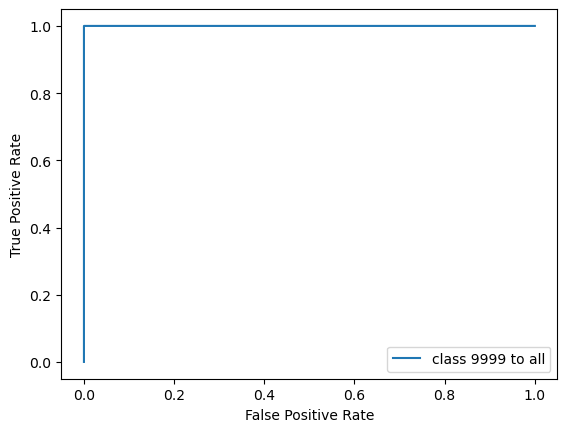

In [4]:
testComputeAllTPRs(10_000)

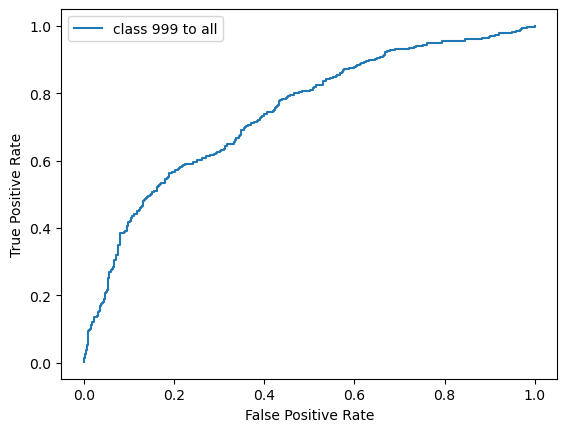

In [5]:
from copy import deepcopy
import random


def sample_label_and_confidence(
    mean_of_distribution_of_high_confidences,
    mean_of_distribution_of_low_confidences,
    standard_deviation
):
    label = random.randint(0, 1)

    mean = mean_of_distribution_of_high_confidences if label == 1 else mean_of_distribution_of_low_confidences
    confidence = random.gauss(mean, standard_deviation)
    confidence = min(1.0, max(0.0, confidence)) # Restrict confidence to [0, 1].

    return label, confidence


def testComputeAllTPRsRealistically(
    mean_of_distribution_of_high_confidences,
    mean_of_distribution_of_low_confidences,
    number_of_samples,
    original_function_to_compute_all_TPRs_should_be_used,
    standard_deviation
):
    tuple_of_labels, tuple_of_confidences = zip(
        *(
            sample_label_and_confidence(
                mean_of_distribution_of_high_confidences,
                mean_of_distribution_of_low_confidences,
                standard_deviation
            ) for _ in range(number_of_samples)
        )
    )
    list_of_labels = list(tuple_of_labels)
    list_of_confidences = deepcopy(list(tuple_of_confidences))
    # Deep copy because function `computeAllTPRs` mutates `list_of_confidences`.
    if original_function_to_compute_all_TPRs_should_be_used:
        computeAllTPRs(list_of_labels, list_of_confidences)
    else:
        computeAllTPRs_improved(list_of_labels, list_of_confidences)


testComputeAllTPRsRealistically(0.75, 0.25, 1_000, True, 0.5)

Below, provide your implementation for Question #2.

In [8]:
def computeAllTPRs_improved(true_label, confs):
    '''
    inputs:
      - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
      - confs: list of confidences

    This method computes the True Positive Rate (TPRs) and FPRs for all relevant
    thresholds given true_label and confs. Relevant thresholds are considered
    all different values found in confs.
    '''

    # Define / initialize  variables
    sentinelValue = -1
    totalPositives = sum(true_label)
    totalNegatives = len(true_label) - totalPositives
    #print(true_label)
    truePositives = 0
    falsePositives = 0
    # Hint: Consider Memory Management
    n = len(confs)
    truePositiveRate = [0.0] * n
    falsePositiveRate = [0.0] * n

    #Hint: Although not explicitly clear, the loop structure below is an 
        #embedded loop; i.e., O(n^2). Do you see why?
    #Hint: If you sort the confidences first you can improve the iteration scheme.
    
    # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
    # append to truePositiveRate and falsePositiveRate lists. 

    confs_is_in_descending_order = True
    for i in range(n - 1):
        if confs[i] < confs[i + 1]:
            confs_is_in_descending_order = False
            break
    
    list_of_indices = []
    if confs_is_in_descending_order:
        list_of_indices = list(range(0, n))
    else:
        list_of_indices = sorted(range(0, n), key = lambda index: confs[index], reverse = True)
    
    for index_of_index, index in enumerate(list_of_indices):
      if true_label[index] == 1:
        truePositives += 1
      else:
        falsePositives += 1

      truePositiveRate[index_of_index] = truePositives / totalPositives
      falsePositiveRate[index_of_index] = falsePositives / totalNegatives
      #print(truePositiveRate)

    # Plot FPR vs TPR for all possible thresholds 
    plt.plot(falsePositiveRate, truePositiveRate, label = 'class ' + str(index) + ' to all')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [ ]:
def computeAllTPRs_improved(true_label, confs):
    '''
    inputs:
      - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
      - confs: list of confidences

    This method computes the True Positive Rate (TPRs) and FPRs for all relevant
    thresholds given true_label and confs. Relevant thresholds are considered
    all different values found in confs.

    The number of confidences n is equal to the number of true labels n.
    1: The number of steps for initializing `totalPositives` is c1 n.
    2, 3, 4, 5, and 6: The numbers of steps for initializing are c2, c3, c4, c5, and c6, for a total of c.
    7: The number of steps for preallocating is c7 n.
    8: The number of steps for preallocating is c8 n.
    9: The number of steps for assigning is c9.
    11: In the worst case, the number of steps for accessing, adding, accessing, and comparing is c11 (n - 1) = c11 n - c11.
    12: In the worst case, the number of steps for assigning is c12 (n - 1) = c12 n - c12.
    13: The number of steps for assigning is c13.
    14: The number of steps for evaluating and deciding is c14.
    15: In the worst case, the number of steps for sorting a range of indices of elements in list of confidences in descending order by corresponding confidence is c15 nlog(n).
        In the list of confidences is already sorted, the number of steps for constructing a list of indices is c15 n.
    17: The number of steps for accessing, comparing, and directing is c17 n.
    18 and 19: The number of steps for incrementing is either c18 n or c19 n, or d n generally.
    20: The number of steps for division and assignment is c20 n.
    21: The number of steps for division and assignment is c21 n.
    22: The number of steps for determining points is c22 n.
    23, 24, 25, and 26: The numbers of steps for modifying graph are c23, c24, c25, and c26, for a total of e.
    c, c9, -c11, -c12, c13, c14, and e may be combined into f.
    c1 n, c7 n, c8 n, c11 n, c12 n, c17 n, d n, c20 n, c21 n, and c22 n may be combined into g n.
    We note c15 nlog(n) or c15 n.
    Time step function T(n) = f + g n + (c15 nlog(n) or c15 n).
    An order class of functions that serve as upper bounds to T(n) is O[nlog(n)] or O(n).
    The time complexity of function `computeAllTPRs_improved` is O[nlog(n)] or O(n).
    '''

    # Define / initialize  variables
    totalPositives = sum(true_label) # 1: Initialize sum to 0, add first label to sum, second label to sum, nth label to sum: c1 n, O(n)
    totalNegatives = len(true_label) - totalPositives # 2: access length property of true_label, subtract number of positives: c2, O(1)
    #print(true_label) # 3: We assume the worst case of including this line. Each element is accessed: c3 n, O(n)
    truePositives = 0  # 4: c4, O(1)
    falsePositives = 0  # 5: c5, O(1)
    # Hint: Consider Memory Management
    n = len(confs) # 6: access length property of confs: c8, O(1)
    truePositiveRate = [0.0] * n  # 7: c6, Create empty list: O(1)
    falsePositiveRate = [0.0] * n # 8: c7, O(1)

    #Hint: Although not explicitly clear, the loop structure below is an 
        #embedded loop; i.e., O(n^2). Do you see why?
    #Hint: If you sort the confidences first you can improve the iteration scheme.
    
    # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
    # append to truePositiveRate and falsePositiveRate lists. 

    confs_is_in_descending_order = True # 9: assign: c9, O(1)
    for i in range(n - 1): # 10: in worst case, access each element: c10 (n - 1), O(n - 1) = O(n)
        if confs[i] < confs[i + 1]: # 11: in worst case, access, add, access, compare: c11, O(1); c11 (n - 1), O(n) factoring in number of iterations
            confs_is_in_descending_order = False # 12: in worst case, assign: # c12, O(1); c12 (n - 1), O(n) factoring in number of iterations
            break # in worst case, doesn't happen
    
    list_of_indices = [] # 13: c13, O(1)
    if confs_is_in_descending_order: # 14: evaluate and decide: c14, O(1)
        list_of_indices = list(range(0, n)) # in worst case, doesn't happen
    else:
        list_of_indices = sorted(range(0, n), key = lambda index: confs[index], reverse = True)
        '''
        15: in worst case, a range of indices of elements in list of confidences is sorted in descending order by corresponding confidence.
        According to https://stackoverflow.com/questions/14434490/what-is-the-complexity-of-the-sorted-function, average and worst case time complexities of sorted are O[nlog(n)].
        Corresponding number of steps is c15 nlog(n).
        '''
    
    for index_of_index, index in enumerate(list_of_indices): # 16: There are n iterations among n indices: c16 n, O(n)
      if true_label[index] == 1: # 17: Access, compare, and direct: c17, O(1); c17 n, O(n) factoring in number of iterations
        truePositives += 1 # 18: Add 1 to number of true positives: c18, O(1); c18 n, O(n) factoring in number of iterations; equal number of steps to line 19; dominating
      else:
        falsePositives += 1 # 19: Add 1 to number of true positives: c19, O(1); c19 n, O(n) factoring in number of iterations; equal number of steps to line 18; dominating

      truePositiveRate[index_of_index] = truePositives / totalPositives # c20: Division and assignment are c20, O(1); c20 n, O(n) factoring in number of iterations
      falsePositiveRate[index_of_index] = falsePositives / totalNegatives # 21: Division and assignment are c21, O(1); c21 n, O(n) factoring in number of iterations
      #print(truePositiveRate) # If we assume the worst case of including this line: c n, O(n); c n^2, O(n^2) factoring in number of iterations. Let's not include this line.

    # Plot FPR vs TPR for all possible thresholds 
    plt.plot(falsePositiveRate, truePositiveRate, label = 'class ' + str(index) + ' to all') # 22: Determining points is c22 n, O(n)
    plt.legend() # 23: c23, O(1)
    plt.xlabel('False Positive Rate') # 24: c24, O(1)
    plt.ylabel('True Positive Rate') # 25: c25, O(1)
    plt.show() # 26: c26, O(1)

In [9]:
def testComputeAllTPRs_improved(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  #numSamples = 10000
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5: 
      lab = 1 
    else: 
      lab = 0
    labels.append(lab)
  #print(labels)
  computeAllTPRs_improved(labels, deepcopy(confList))  # Why a deepcopy here?

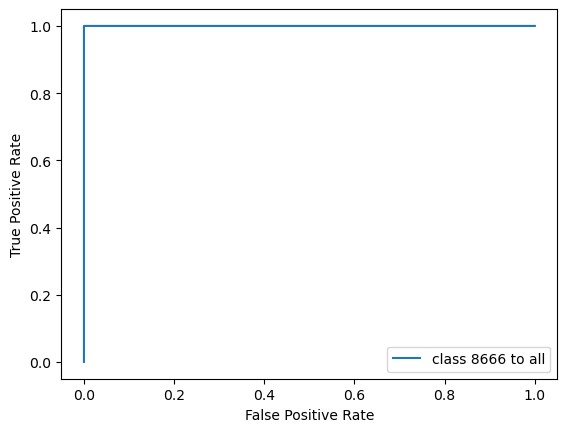

In [10]:
testComputeAllTPRs_improved(10_000)

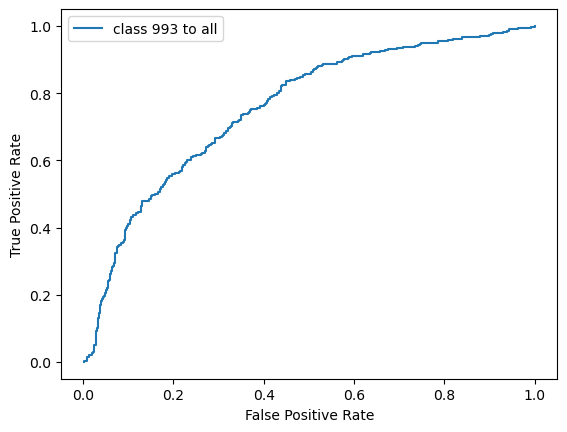

In [11]:
testComputeAllTPRsRealistically(0.75, 0.25, 1_000, False, 0.5)

Question #3. Below, provide your code which records and plots the runtime for the original and improved methods. 

The theoretical time complexities of both methods in the worst cases are O(n^2) and O[nlog(n)]. The improved function with time complexity O[nlog(n)] in the worst case is more efficient.

In [15]:
def computeAllTPRs_without_graphing(true_label, confs):
    '''
    inputs:
      - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
      - confs: list of confidences

    This method computes the True Positive Rate (TPRs) and FPRs for all relevant
    thresholds given true_label and confs. Relevant thresholds are considered
    all different values found in confs.
    '''

    # Define / initialize  variables
    sentinelValue = -1
    totalPositives = sum(true_label)
    totalNegatives = len(true_label) - totalPositives
    #print(true_label)
    truePositives = 0
    falsePositives = 0
    # Hint: Consider Memory Management
    truePositiveRate = []
    falsePositiveRate = []

    #Hint: Although not explicitly clear, the loop structure below is an 
        #embedded loop; i.e., O(n^2). Do you see why?
    #Hint: If you sort the confidences first you can improve the iteration scheme.
    
    # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
    # append to truePositiveRate and falsePositiveRate lists. 

    for i in range(len(confs)):
      maxVal = max(confs)
      argMax = argmax(confs)
      confs[argMax] = sentinelValue
      #print(argMax)
      if true_label[argMax] == 1:
        truePositives += 1
      else:
        falsePositives += 1

      truePositiveRate.append(truePositives / totalPositives)
      falsePositiveRate.append(falsePositives / totalNegatives)
      #print(truePositiveRate)

    # Plot FPR vs TPR for all possible thresholds 
    '''
    plt.plot(falsePositiveRate, truePositiveRate, label = 'class ' + str(i) + ' to all')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    '''

In [16]:
def computeAllTPRs_improved_without_graphing(true_label, confs):
    '''
    inputs:
      - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
      - confs: list of confidences

    This method computes the True Positive Rate (TPRs) and FPRs for all relevant
    thresholds given true_label and confs. Relevant thresholds are considered
    all different values found in confs.
    '''

    # Define / initialize  variables
    sentinelValue = -1
    totalPositives = sum(true_label)
    totalNegatives = len(true_label) - totalPositives
    #print(true_label)
    truePositives = 0
    falsePositives = 0
    # Hint: Consider Memory Management
    n = len(confs)
    truePositiveRate = [0.0] * n
    falsePositiveRate = [0.0] * n

    #Hint: Although not explicitly clear, the loop structure below is an 
        #embedded loop; i.e., O(n^2). Do you see why?
    #Hint: If you sort the confidences first you can improve the iteration scheme.
    
    # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
    # append to truePositiveRate and falsePositiveRate lists. 

    confs_is_in_descending_order = True
    for i in range(n - 1):
        if confs[i] < confs[i + 1]:
            confs_is_in_descending_order = False
            break
    
    list_of_indices = []
    if confs_is_in_descending_order:
        list_of_indices = list(range(0, n))
    else:
        list_of_indices = sorted(range(0, n), key = lambda index: confs[index], reverse = True)
    
    for index_of_index, index in enumerate(list_of_indices):
      if true_label[index] == 1:
        truePositives += 1
      else:
        falsePositives += 1

      truePositiveRate[index_of_index] = truePositives / totalPositives
      falsePositiveRate[index_of_index] = falsePositives / totalNegatives
      #print(truePositiveRate)

    # Plot FPR vs TPR for all possible thresholds
    '''
    plt.plot(falsePositiveRate, truePositiveRate, label = 'class ' + str(index) + ' to all')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    '''

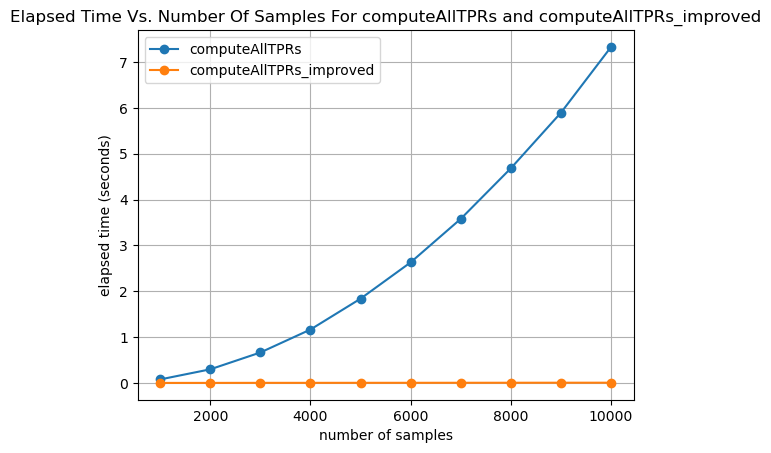

In [17]:
import time

list_of_numbers_of_samples = [1_000, 2_000, 3_000, 4_000, 5_000, 6_000, 7_000, 8_000, 9_000, 10_000]
list_of_elapsed_times_for_computeAllTPRs = []
list_of_elapsed_times_for_computeAllTPRs_improved = []

for number_of_samples in list_of_numbers_of_samples:
    
    # Run most of testComputeAllTPRs.
    confList = []
    labels = []
    maxVal = 10_000
    for i in range(0, number_of_samples):
        n = random.randint(1, maxVal)
        confList.append(n / maxVal)
        if n / maxVal > 0.5:
            lab = 1
        else:
            lab = 0
        labels.append(lab)
    
    start = time.perf_counter()
    computeAllTPRs_without_graphing(labels, deepcopy(confList))
    stop = time.perf_counter()
    elapsed_time = stop - start
    list_of_elapsed_times_for_computeAllTPRs.append(elapsed_time)

    start = time.perf_counter()
    computeAllTPRs_improved_without_graphing(labels, deepcopy(confList))
    stop = time.perf_counter()
    elapsed_time = stop - start
    list_of_elapsed_times_for_computeAllTPRs_improved.append(elapsed_time)

plt.figure()
plt.plot(list_of_numbers_of_samples, list_of_elapsed_times_for_computeAllTPRs, marker = 'o', label = "computeAllTPRs")
plt.plot(list_of_numbers_of_samples, list_of_elapsed_times_for_computeAllTPRs_improved, marker = 'o', label = "computeAllTPRs_improved")
plt.xlabel("number of samples")
plt.ylabel("elapsed time (seconds)")
plt.title("Elapsed Time Vs. Number Of Samples For computeAllTPRs and computeAllTPRs_improved")
plt.legend()
plt.grid(True)

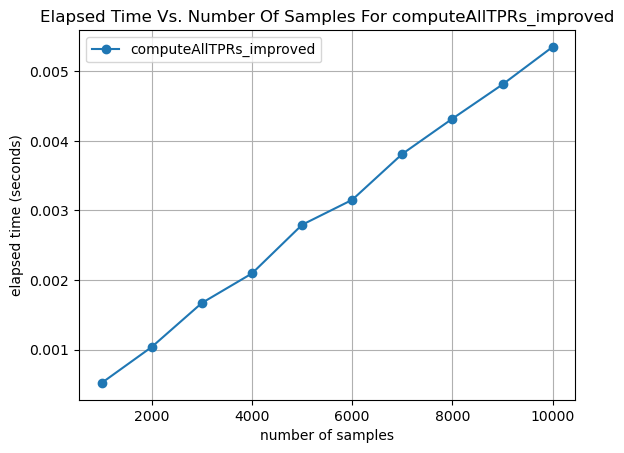

In [18]:
import time

list_of_numbers_of_samples = [1_000, 2_000, 3_000, 4_000, 5_000, 6_000, 7_000, 8_000, 9_000, 10_000]
list_of_elapsed_times_for_computeAllTPRs_improved = []

for number_of_samples in list_of_numbers_of_samples:
    
    # Run most of testComputeAllTPRs.
    confList = []
    labels = []
    maxVal = 10_000
    for i in range(0, number_of_samples):
        n = random.randint(1, maxVal)
        confList.append(n / maxVal)
        if n / maxVal > 0.5:
            lab = 1
        else:
            lab = 0
        labels.append(lab)

    start = time.perf_counter()
    computeAllTPRs_improved_without_graphing(labels, deepcopy(confList))
    stop = time.perf_counter()
    elapsed_time = stop - start
    list_of_elapsed_times_for_computeAllTPRs_improved.append(elapsed_time)

plt.figure()
plt.plot(list_of_numbers_of_samples, list_of_elapsed_times_for_computeAllTPRs_improved, marker = 'o', label = "computeAllTPRs_improved")
plt.xlabel("number of samples")
plt.ylabel("elapsed time (seconds)")
plt.title("Elapsed Time Vs. Number Of Samples For computeAllTPRs_improved")
plt.legend()
plt.grid(True)

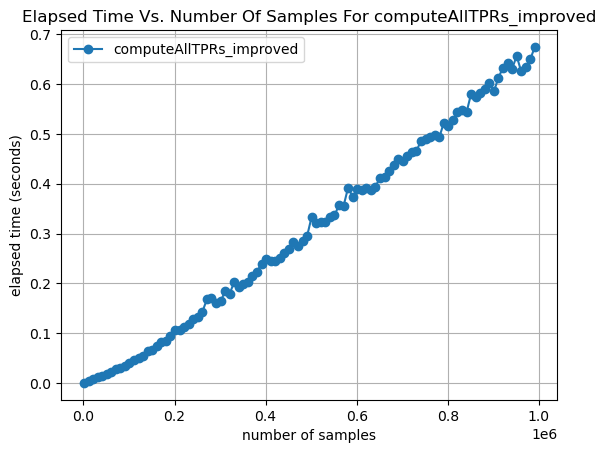

In [23]:
import time

list_of_numbers_of_samples = list(range(1_000, 1_001_000, 10_000))
list_of_elapsed_times_for_computeAllTPRs_improved = []

for number_of_samples in list_of_numbers_of_samples:
    
    # Run most of testComputeAllTPRs.
    confList = []
    labels = []
    maxVal = 10_000
    for i in range(0, number_of_samples):
        n = random.randint(1, maxVal)
        confList.append(n / maxVal)
        if n / maxVal > 0.5:
            lab = 1
        else:
            lab = 0
        labels.append(lab)

    start = time.perf_counter()
    computeAllTPRs_improved_without_graphing(labels, confList)
    stop = time.perf_counter()
    elapsed_time = stop - start
    list_of_elapsed_times_for_computeAllTPRs_improved.append(elapsed_time)

plt.figure()
plt.plot(list_of_numbers_of_samples, list_of_elapsed_times_for_computeAllTPRs_improved, marker = 'o', label = "computeAllTPRs_improved")
plt.xlabel("number of samples")
plt.ylabel("elapsed time (seconds)")
plt.title("Elapsed Time Vs. Number Of Samples For computeAllTPRs_improved")
plt.legend()
plt.grid(True)

The runtime of `computeAllTPRs` grows quadratically with number of samples as expected, verifying that the time complexity of `computeAllTPRs` in the worst case is $O(n^2)$. `computeAllTPRs` takes about 7.3 seconds for 10,000 samples.

The runtime of `computeAllTPRs_improved` grows log-linearly with number of samples as expected, verifying that the time complexity of `computeAllTPRs_improved` in the worst case is $O[nlog(n)]$. `computeAllTPRs_improved` takes about 0.0055 seconds for 10,000 samples.